Exploring Class Imbalance

In [83]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [84]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [85]:
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_path = os.path.join(repo_root, 'predicting-proficiency', 'data')

In [86]:
file_names = [
    ('2024-09-11 District A Benchmarks.json', 'a_benchmarks_2024-09-11.json'),
    ('2024-10-15 District A Benchmarks Additional.json', 'benchmarks_additional45.json'),
    ('2024-09-11 District A Scores.json', 'a_scores_2024-09-11.json'),
    ('2024-09-11 District A Vendor Student Usage.json', 'a_vendorUsage_2024-09-11.json'),
    ('district.json', 'a_all_2024-08-29.json'),
    ('vendors_202410081500.json', 'a_vendorKey_2024-10-8.json')

]

for old_name, new_name in file_names:
    old_path = os.path.join(data_path, 'raw', old_name)
    new_path = os.path.join(data_path, 'raw', new_name)
    if os.path.exists(old_path) and not os.path.exists(new_path):
        os.rename(old_path, new_path)

In [87]:
with open('data/raw/a_all_2024-08-29.json', 'r') as file:
    data = json.loads(file.read())

with open('data/raw/a_scores_2024-09-11.json', 'r') as file:
    scores_json = json.loads(file.read())

with open('data/raw/a_benchmarks_2024-09-11.json', 'r') as file:
    benchmarks_json = json.loads(file.read())

with open('data/raw/a_vendorUsage_2024-09-11.json', 'r') as file:
    vendorUsage_json = json.loads(file.read())
with open('data/raw/vendors_202410081500.json', 'r') as file:
    vendorKey_json = json.loads(file.read())
with open('data/raw/benchmarks_additional45.json', 'r') as file:
    benchmarksAdd_json = json.loads(file.read())

In [88]:
scores_data = scores_json[list(scores_json.keys())[0]]
scores_df = pd.DataFrame(scores_data)

benchmarksAdd_data = benchmarksAdd_json[list(benchmarksAdd_json.keys())[0]]
benchmarksAdd_df = pd.DataFrame(benchmarksAdd_data)

benchmarks_df = pd.DataFrame(benchmarks_json['benchmarks'])
schools_df = pd.DataFrame(data['schools'])
courseSections_df = pd.DataFrame(data['courseSections'])
courseSectionRosters_df = pd.DataFrame(data['courseSectionRosters'])

vendorUsage_data = vendorUsage_json[list(vendorUsage_json.keys())[0]]
vendorUsage_df = pd.DataFrame(vendorUsage_data)

vendorKey_data = vendorKey_json[list(vendorKey_json.keys())[0]]
vendorKey_df = pd.DataFrame(vendorKey_data)

In [89]:
data_path = os.path.join(repo_root, 'predicting-proficiency', 'data')

processed_dir = os.path.join(data_path, 'processed')
if os.path.exists(processed_dir):
    for file in os.listdir(processed_dir):
        file_path = os.path.join(processed_dir, file)
        if os.path.isfile(file_path):
            os.unlink(file_path)

os.makedirs(os.path.dirname(data_path), exist_ok=True)
benchmarks_df.to_csv(os.path.join(data_path, 'processed', 'a_benchmarks_2024-09-11.csv'), index=False)
schools_df.to_csv(os.path.join(data_path, 'processed', 'a_schools_2024-08-29.csv'), index=False)
courseSections_df.to_csv(os.path.join(data_path, 'processed', 'a_courseSections_2024-08-29.csv'), index=False)
courseSectionRosters_df.to_csv(os.path.join(data_path, 'processed', 'a_courseSectionRosters_2024-08-29.csv'), index=False)
scores_df.to_csv(os.path.join(data_path, 'processed', 'a_scores_2024-09-11.csv'), index=False)
vendorUsage_df.to_csv(os.path.join(data_path, 'processed', 'a_vendorUsage_2024-09-11.csv'), index=False)
vendorKey_df.to_csv(os.path.join(data_path, 'processed', 'a_vendorKey_2024-10-8.csv'), index=False)
benchmarksAdd_df.to_csv(os.path.join(data_path, 'processed', 'a_benchmarks_2024-10-15.csv'), index=False)

benchmarks

In [90]:
benchmarks_df.head()

districtId  year  level             dataSource   value
0          45  2017      3     value_scantronMath  2356.0
1          45  2017      3  value_scantronReading  2563.0
2          45  2017      4     value_scantronMath  2493.0
3          45  2017      4  value_scantronReading  2674.0
4          45  2017      5     value_scantronMath  2584.0

In [91]:
schools_df.head()

id                 name districtId costCenter abbreviation  \
0  222         Elementary A         45          5          EES   
1  223      Middle School A         45          8          EMS   
2  224        High School A         45         10         ECHS   
3  225        Junior High B         45         12         ECJH   
4  226  Elementary School B         45         18          HES   

  acqRequestSelectable oneRoster_sourcedId oneRoster_ticketId  
0                    1                                      0  
1                    1                                      0  
2                    1                                      0  
3                    1                                      0  
4                    1                                      0

In [92]:
courseSections_df.head()

id    vanityId  year schoolId
0  40388        PE 4  2015      222
1  40389   READING 4  2015      222
2  40390   HmroomPK6  2015      222
3  40391  LANGUAGE 4  2015      222
4  40392   SCIENCE 4  2015      222

In [93]:
courseSectionRosters_df.head()

id courseSectionId studentId studentLevel ticket
0  1047696           39975     45333            4       
1  1047704           39975     56116            4       
2  1047706           39975     45345            4       
3  1047715           39975     45400            4       
4  1047729           39975     45413            4

In [94]:
scores_df.head()

studentId  studentLevel  year  measurementTypeId  subgroup_specialEd  \
0      44774             9  2018                  6                   0   
1      44774             8  2017                  6                   0   
2      44774             8  2017                  4                   0   
3      44775             8  2017                  4                   0   
4      44775             8  2017                  6                   0   

   subgroup_lunchStatus  subgroup_gender  subgroup_ethnicity  subgroup_ell  \
0                     0                0                   0             0   
1                     0                0                   0             0   
2                     0                0                   0             0   
3                     0                0                   0             0   
4                     0                0                   0             0   

   subgroup_bottom25  value_actMathScore  value_actEnglishScore  \
0                  0                 0.0                    0.0   
1                  0                 0.0                    0.0   
2                  0                 0.0                    0.0   
3                  0                 0.0                    0.0   
4                  0                 0.0                    0.0   

   value_actReadingScore  value_actScienceScore  value_actCompositeScore  \
0                    0.0                    0.0                      0.0   
1                    0.0                    0.0                      0.0   
2                    0.0                    0.0                      0.0   
3                    0.0                    0.0                      0.0   
4                    0.0                    0.0                      0.0   

   value_nweaMath  value_nweaReading  value_nweaEnglish  value_iReadyMath  \
0             0.0                0.0                0.0                 0   
1             0.0                0.0                0.0                 0   
2             0.0                0.0                0.0                 0   
3             0.0                0.0                0.0                 0   
4             0.0                0.0                0.0                 0   

   value_iReadyReading  value_actMasteryComposite  value_actMasteryReading  \
0                    0                        0.0                      0.0   
1                    0                        0.0                      0.0   
2                    0                        0.0                      0.0   
3                    0                        0.0                      0.0   
4                    0                        0.0                      0.0   

   value_actMasteryMath  value_actMasteryScience  value_actMasteryEnglish  \
0                   0.0                      0.0                      0.0   
1                   0.0                      0.0                      0.0   
2                   0.0                      0.0                      0.0   
3                   0.0                      0.0                      0.0   
4                   0.0                      0.0                      0.0   

   value_nweaELA  value_scantronMath  value_scantronReading  value_mapMath  \
0            0.0                 0.0                      0              0   
1            0.0              2841.0                   2950              0   
2            0.0              2808.0                   2936              0   
3            0.0              2580.0                   2660              0   
4            0.0              2705.0                   2670              0   

   value_mapEnglish  value_mapReading  value_mapRLA  value_scantronScience  \
0                 0                 0             0                      0   
1                 0                 0             0                      0   
2                 0                 0             0                      0   
3                 0                 0          

In [95]:
print(scores_df.columns)
print(scores_df.columns)
print(scores_df.shape)

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

In [96]:
#get rid exams that have a unique value of 1
scores_df = scores_df.drop(columns = [col for col in scores_df if scores_df[col].nunique() == 1])
print(scores_df.shape)
#drop grade level focous on 1-12
grade_level_drop = [0, 99, 98, 97, 96, -1]
scores_df = scores_df[~scores_df['studentLevel'].isin(grade_level_drop)]

(303750, 58)


In [97]:
print(scores_df.shape)

(297416, 58)


0    297412
3         4
Name: subgroup_ell, dtype: int64

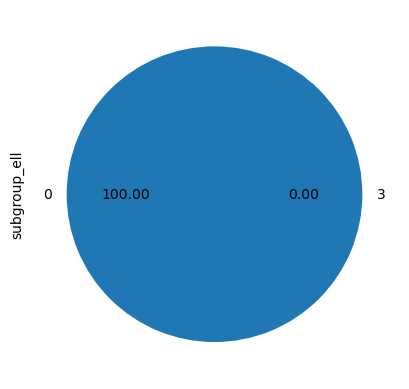

In [98]:
scores_df['subgroup_ell'].value_counts().plot.pie(autopct= '%.2f')
scores_df['subgroup_ell'].value_counts() #0 is no, 3 is yes

In [99]:
scores_df['subgroup_gender'].value_counts()

0    283786
5      5830
6      5796
4      1774
3       230
Name: subgroup_gender, dtype: int64

<Axes: ylabel='subgroup_lunchStatus'>

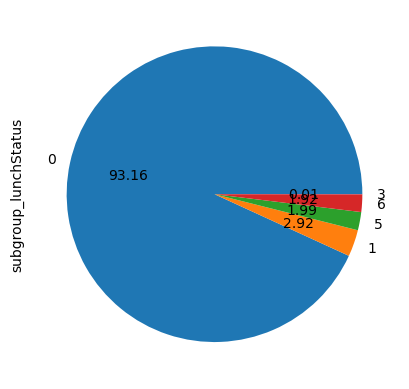

In [100]:
scores_df['subgroup_lunchStatus'].value_counts().plot.pie(autopct= '%.2f')
#majority students reduced lunch

In [101]:
scores_df['subgroup_lunchStatus'].value_counts()


0    277060
1      8695
5      5920
6      5706
3        35
Name: subgroup_lunchStatus, dtype: int64

<Axes: ylabel='subgroup_bottom25'>

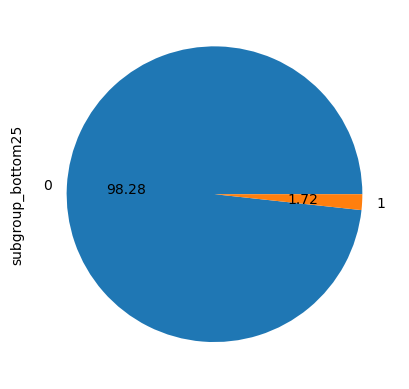

In [102]:
scores_df['subgroup_bottom25'].value_counts().plot.pie(autopct= '%.2f')


In [103]:
scores_df['subgroup_bottom25'].value_counts() #0 = false #1 is ture


0    292306
1      5110
Name: subgroup_bottom25, dtype: int64

<Axes: ylabel='year'>

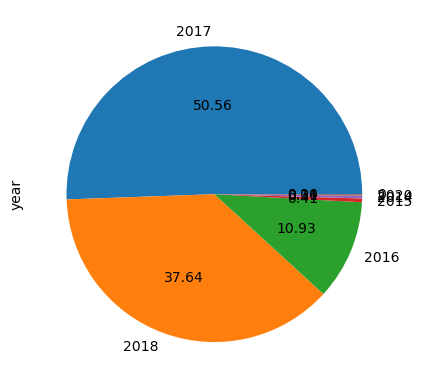

In [104]:
scores_df['year'].value_counts().plot.pie(autopct= '%.2f')


In [105]:
scores_df['year'].value_counts()


2017    150388
2018    111940
2016     32495
2015      1220
2014       936
2020       429
0            8
Name: year, dtype: int64

In [106]:
#group by studentID
yearsPresent = scores_df.groupby('studentId')['year'].apply(list)
print(yearsPresent)

studentId
44774                             [2018, 2017, 2017]
44775                             [2017, 2017, 2018]
44776                             [2018, 2017, 2017]
44777           [2017, 2017, 2020, 2018, 2018, 2018]
44778                             [2018, 2017, 2017]
44779                             [2017, 2017, 2018]
44780                             [2018, 2017, 2017]
44781                                   [2017, 2017]
44782                             [2017, 2017, 2018]
44783           [2018, 2017, 2017, 2020, 2018, 2018]
44784           [2018, 2018, 2017, 2017, 2018, 2020]
44785                             [2017, 2017, 2018]
44786                             [2018, 2017, 2017]
44787                             [2017, 2017, 2018]
44788                             [2018, 2017, 2017]
44789                             [2017, 2017, 2018]
44790                             [2018, 2017, 2017]
44791                             [2017, 2017, 2018]
44792                             [2

In [107]:
year_drop = [2020, 2015, 2016, 2014, 0]
scores_df = scores_df[~scores_df['year'].isin(year_drop)]
scores_df['year'].unique()

array([2018, 2017], dtype=int64)

<Axes: ylabel='year'>

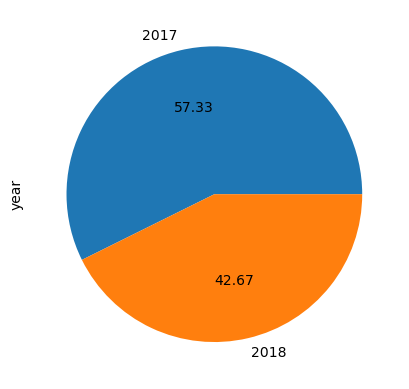

In [108]:

scores_df['year'].value_counts().plot.pie(autopct= '%.2f')


In [109]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
from imblearn.under_sampling import RandomUnderSampler
#care more about the exam itself and the proficent levels, make sure proficent and nonproficent students are well represetned in the data,
#so the model is not bias


In [110]:
#used random over sampler, addresses imbalanced datasets by oversampling the minority class. In an imbalanced dataset, 
# one class has significantly fewer samples compared to another class, which can lead to biased model performance favoring the majority class.
#I should balanced the scores_df based on the number of students who are and are not proficent in math and reading
y = scores_df['year']
X = scores_df.drop(columns = ['year'])

ros = RandomOverSampler(random_state=0)

X_resampled,y_resampled = ros.fit_resample(X,y)
scores_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
scores_df_resampled['year'] = y_resampled

<Axes: ylabel='year'>

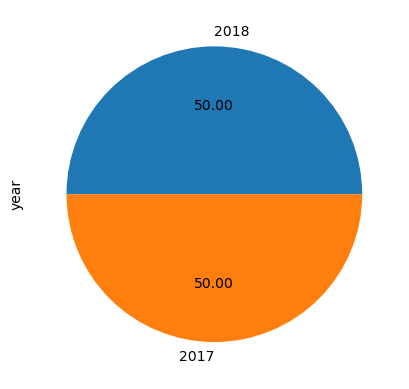

In [111]:
scores_df_resampled['year'].value_counts().plot.pie(autopct= '%.2f')


In [118]:
#create a label called proficent in reading and math for 3rd grade only, work on 3rd grade 2017 
#total 3rd grade 2017 
filtered_3students = scores_df[(scores_df['studentLevel'] == 3) & (scores_df['year'] == 2017)]
# Count the number of students
count_students = len(filtered_3students)
print(f"Number of students in 3rd grade 2017:{count_students}")

#scantron math 2017, find the students who scored = or > then the benchmark
grade3_2017math = scores_df[(scores_df['value_scantronMath'] >= 2356) & (scores_df['studentLevel'] == 3) & (scores_df['year'] == 2017)]
grade3_2017math_count = grade3_2017math['studentId'].count()
#list of studentId who are proficent in math 
grade3_2017math_prof = grade3_2017math['studentId'].tolist()
print(f"Number of students who were proficent in math: {grade3_2017math_count}")
#print(grade3_2017math_prof)


#Scantron Reading grade 3, 2017
grade3_2017read = scores_df[(scores_df['value_scantronReading'] >= 2563) & scores_df['studentLevel'] & (scores_df['year'] == 2017)]
grade3_2017read_count = grade3_2017read['studentId'].count()
grade3_2017read_prof = grade3_2017read['studentId'].tolist()
print(f"\nNumber of students who were proficent in reading:{grade3_2017read_count}")
#print(grade3_2017read_prof)

#find the studentId who are profienct in math and reading
grade3_2017both_prof = [student_id for student_id in grade3_2017math_prof if student_id in grade3_2017read_prof]
grade3_2017count = len(grade3_2017both_prof)
print(f"Total number of students who are proficent in reading and math",grade3_2017count) #20100
print(f"Total percentage of students who were proficent in math and reading:",( grade3_2017count/count_students)*100)



Number of students in 3rd grade 2017:20100
Number of students who were proficent in math: 4277

Number of students who were proficent in reading:21969
Total number of students who are proficent in reading and math 3041
Total percentage of students who were proficent in math and reading: 15.129353233830845


In [113]:
#filtering 3rd grade 
grade3_2017_df = scores_df_resampled[(scores_df_resampled['studentLevel'] == 3) & (scores_df_resampled['year'] == 2017)].copy()
grade3_2017_df.head()
print(grade3_2017_df.shape)

(20100, 58)


In [114]:
#benchmark is scantronMath and scantronReadin
grade3_2017_df.loc[:,'proficientReading'] = (grade3_2017_df['value_scantronReading'] >= 2563).astype(int)
grade3_2017_df.loc[:,'proficientMath'] = (grade3_2017_df['value_scantronMath'] >= 2356).astype(int)

grade3_2017_df.head()

studentId  studentLevel  measurementTypeId  subgroup_specialEd  \
13945      50155             3                  4                   0   
13946      50155             3                  6                   0   
14145      50215             3                  6                   0   
14146      50215             3                  4                   0   
14211      50241             3                  4                   0   

       subgroup_lunchStatus  subgroup_gender  subgroup_ethnicity  \
13945                     0                0                   0   
13946                     0                0                   0   
14145                     0                0                   0   
14146                     0                0                   0   
14211                     0                0                   0   

       subgroup_ell  subgroup_bottom25  value_actMathScore  \
13945             0                  1                 0.0   
13946             0                  1                 0.0   
14145             0                  1                 0.0   
14146             0                  1                 0.0   
14211             0                  1                 0.0   

       value_actEnglishScore  value_actReadingScore  value_actScienceScore  \
13945                    0.0                    0.0                    0.0   
13946                    0.0                    0.0                    0.0   
14145                    0.0                    0.0                    0.0   
14146                    0.0                    0.0                    0.0   
14211                    0.0                    0.0                    0.0   

       value_actCompositeScore  value_nweaMath  value_nweaReading  \
13945                      0.0             0.0                0.0   
13946                      0.0             0.0                0.0   
14145                      0.0             0.0                0.0   
14146                      0.0             0.0                0.0   
14211                      0.0             0.0                0.0   

       value_iReadyMath  value_iReadyReading  value_actMasteryComposite  \
13945                 0                    0                        0.0   
13946                 0                    0                        0.0   
14145                 0                    0                        0.0   
14146                 0                    0                        0.0   
14211                 0                    0                        0.0   

       value_actMasteryReading  value_actMasteryMath  value_actMasteryScience  \
13945                      0.0                   0.0                      0.0   
13946                      0.0                   0.0                      0.0   
14145                      0.0                   0.0                      0.0   
14146                      0.0                   0.0                      0.0   
14211                      0.0                   0.0                      0.0   

       value_actMasteryEnglish  value_nweaELA  value_scantronMath  \
13945                      0.0            0.0              2120.0   
13946                      0.0            0.0              2212.0   
14145                      0.0            0.0              1870.0   
14146                      0.0            0.0              1774.0   
14211                      0.0            0.0              1524.0   

       value_scantronReading  value_mapMath  value_mapReading  value_mapRLA  \
13945                   2075              0                 0             0   
13946                   1973              0                 0             0   
14145                   1831              0                 0             0   
14146                   1720              0                 0             0   
14211                   1669              0                 0             0   

       value_scantronScience  value_scantronLanguage  \
13945             

<Axes: ylabel='proficientReading'>

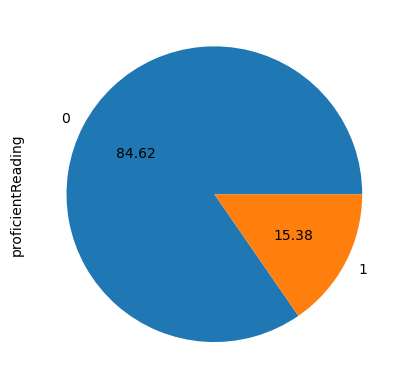

In [115]:
grade3_2017_df['proficientReading'].value_counts().plot.pie(autopct= '%.2f')

In [116]:
y = grade3_2017_df['proficientReading']
X = grade3_2017_df.drop(columns = ['proficientReading'])

rus = RandomUnderSampler(random_state=0)

X_resampled,y_resampled = rus.fit_resample(X,y)
grade3_2017_dfResampled = pd.DataFrame(X_resampled, columns=X.columns)
grade3_2017_dfResampled['proficientReading'] = y_resampled

<Axes: ylabel='proficientReading'>

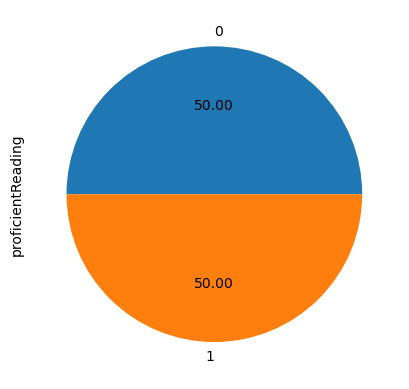

In [117]:
grade3_2017_dfResampled['proficientReading'].value_counts().plot.pie(autopct= '%.2f')
